# Applied Machine Learning Coursework

- To be completed by **5pm** on **6th December** and uploaded to the coursework submission point on Moodle.

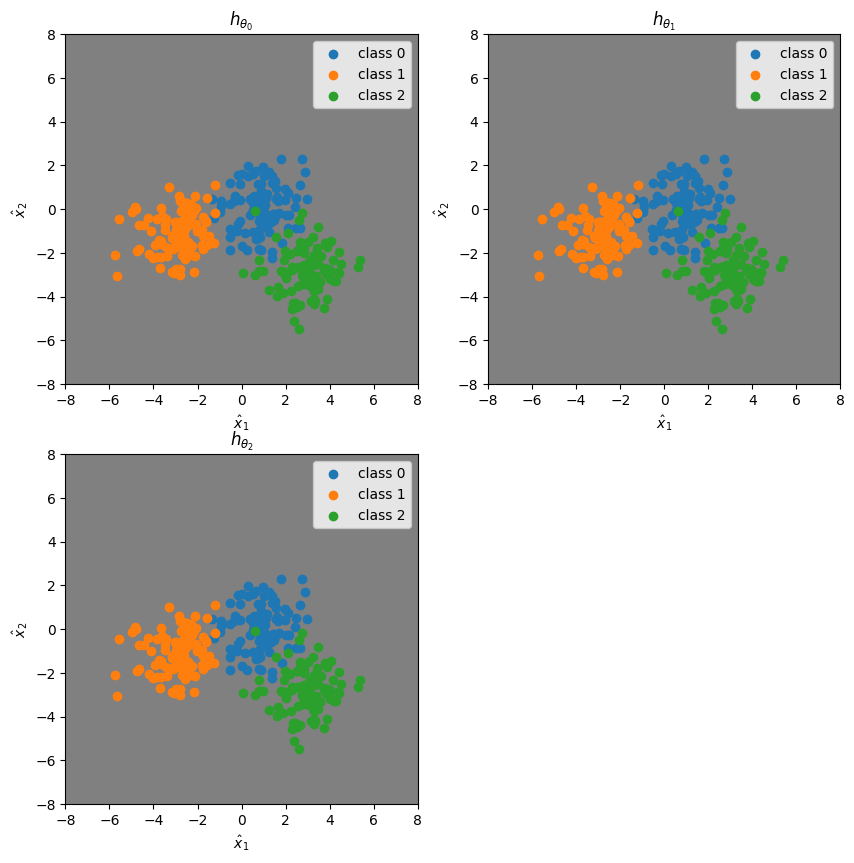

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def synthetic_data(m=300):
    Xh = np.vstack([np.random.randn(m//3,2) + np.array([1,0]),
                    np.random.randn(m//3,2) + np.array([-3,-1]), 
                    np.random.randn(m//3,2) + np.array([3,-3])])
    Y = np.vstack([np.ones((m//3,1)) @ np.array([[1,0,0]]),
                   np.ones((m//3,1)) @ np.array([[0,1,0]]),
                   np.ones((m//3,1)) @ np.array([[0,0,1]])])
    return Xh, Y

def extend_X(Xh):
    X = np.ones((Xh.size//Xh.shape[-1], Xh.shape[-1]+1))
    X[:, 1:] = Xh
    return X

def plot_2D_data(Xh, Y, Theta=0):
    X1,X2 = np.meshgrid(np.linspace(-8,8,99), np.linspace(-8,8,99))
    Xgrid = np.vstack([X1.ravel(), X2.ravel()]).T
    try:
        Ypred = h(Xgrid, Theta)
    except:
        Ypred = 0.5*np.ones((Xgrid.shape[0], Y.shape[1]))
    plt.figure(figsize=(10,10))
    for k in range(Y.shape[1]):
        plt.subplot(2, int(np.ceil(Y.shape[1]/2)), k+1)
        plt.contourf(X1, X2, Ypred[:,k].reshape(X1.shape), cmap='gray')
        for j in range(Y.shape[1]):
            plt.scatter(Xh[np.argmax(Y, axis=1)==j, 0], Xh[np.argmax(Y, axis=1)==j, 1], label=f"class {j}")
        plt.title("$h_{θ_{"+str(k)+"}}$")
        plt.xlabel("$\hat x_1$")
        plt.ylabel("$\hat x_2$")
        plt.legend()
    plt.show()

def test_h1():
    Xh = np.array([[1]])
    Theta = np.array([[0.5], [1]])
    assert np.abs(h(Xh, Theta) - 1)<1e-7, "test_h1 detected a wrong h value"

def test_loss1():
    Xh = np.array([[1]])
    Theta = np.array([[0.5], [1]])
    Y = np.array([[1]])
    assert np.abs(loss(Xh, Theta, Y))<1e-7, "test_loss1 detected a wrong loss value"

def test_grad1():
    Xh = np.array([[1]])
    Theta = np.array([[0.5], [1]])
    Y = np.array([[1]])
    assert np.linalg.norm(grad_loss(Xh, Theta, Y))<1e-7, "test_grad1 detected a wrong gradient value"

def test_h2():
    Xh = np.array([[-1]])
    Theta = np.array([[1,0,0], [1,0,0]])
    assert np.linalg.norm(h(Xh, Theta) - np.ones((1,3))/3)<1e-7, "test_h2 detected a wrong h value"

def test_loss2():
    Xh = np.array([[-1]])
    Theta = np.array([[1,0,0], [1,0,0]])
    Y = np.array([[0.5,0,0.5]])
    assert np.abs(loss(Xh, Theta, Y) - np.log(3))<1e-7, "test_loss2 detected a wrong loss value"

def test_grad2():
    Xh = np.array([[-1]])
    Theta = np.array([[1,0,0], [1,0,0]])
    Y = np.array([[0.5,0,0.5]])
    G_exact = np.array([[-1/6,1/3,-1/6], [1/6,-1/3,1/6]])
    assert np.linalg.norm(grad_loss(Xh, Theta, Y) - G_exact)<1e-7, "test_grad2 detected a wrong gradient value"

def test_h3():
    Xh = np.array([[1,0], [0,1]])
    Theta = np.array([[1,0], [0,1], [0,1]])
    assert np.linalg.norm(h(Xh, Theta) - np.ones((2,2))/2)<1e-7, "test_h3 detected a wrong h value"

def test_loss3():
    Xh = np.array([[1,0], [0,1]])
    Theta = np.array([[1,0], [0,1], [0,1]])
    Y = np.array([[0,1], [0.25,0.75]])
    assert np.abs(loss(Xh, Theta, Y) + np.log(0.5))<1e-7, "test_loss3 detected a wrong loss value"

def test_grad3():
    Xh = np.array([[1,0], [0,1]])
    Theta = np.array([[1,0], [0,1], [0,1]])
    Y = np.array([[0,1], [0.25,0.75]])
    G_exact = np.array([[3/8,-3/8], [1/4,-1/4], [1/8,-1/8]])
    assert np.linalg.norm(grad_loss(Xh, Theta, Y) - G_exact)<1e-7, "test_grad3 detected a wrong gradient value"


Xh, Y = synthetic_data()
plot_2D_data(Xh, Y)